In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
#Classical Search
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute

In [3]:
myList = [5,4,6,9,1,2,3,7,8,0]

In [4]:
def oracle(number):
    winningNumber = 8
    if number == winningNumber:
        response = True
    else:
        response = False
    return response

In [5]:
for index, number in enumerate(myList):
    if oracle(number) is True:
        print(f"winning number index: {index}")
        print(f"execution count: {index+1}")
        break

winning number index: 8
execution count: 9


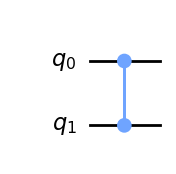

In [6]:
#Quantum Model with Grover's Algorithm
#Oracle Circuit (WinningNumber = 11)

oracleCircuit = QuantumCircuit(2,name='oracleCircuit')
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')

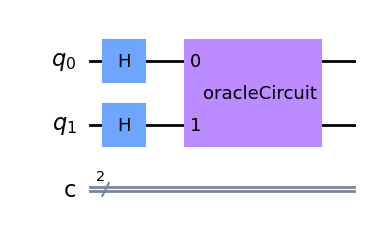

In [7]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

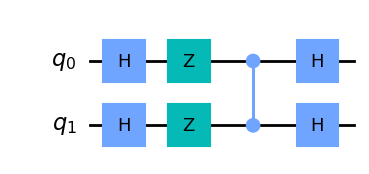

In [8]:
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

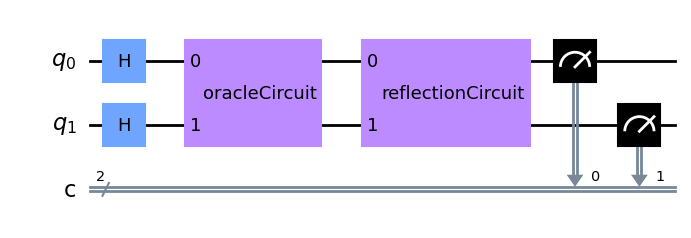

In [9]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

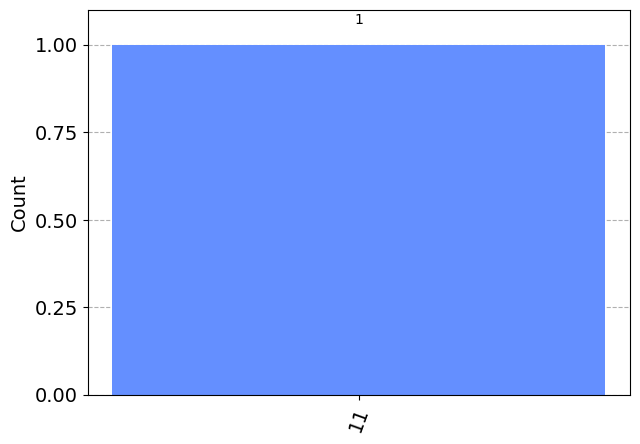

In [10]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit,backend=backend,shots=1).result()
counts = result.get_counts(mainCircuit)
plot_histogram([counts])

In [11]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import PhaseOracle
from qiskit.algorithms import Grover, AmplificationProblem

%matplotlib inline

/tmp/ipykernel_137/2447404277.py:4: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import Grover, AmplificationProblem


In [12]:
pip install tweedledum


[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
oracle = PhaseOracle('((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)')
problem = AmplificationProblem(oracle=oracle, is_good_state=oracle.evaluate_bitstring)
backend = Aer.get_backend('qasm_simulator')
grover = Grover(quantum_instance=backend)
result = grover.amplify(problem)

/tmp/ipykernel_137/596645950.py:4: DeprecationWarning: ``qiskit.algorithms.amplitude_amplifiers.grover.Grover.__init__()``'s argument ``quantum_instance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the ``sampler`` argument. See https://qisk.it/algo_migration for a migration guide.
  grover = Grover(quantum_instance=backend)


In [14]:
print(result.circuit_results[0])

{'1100': 250, '0111': 250, '0011': 281, '1101': 243}


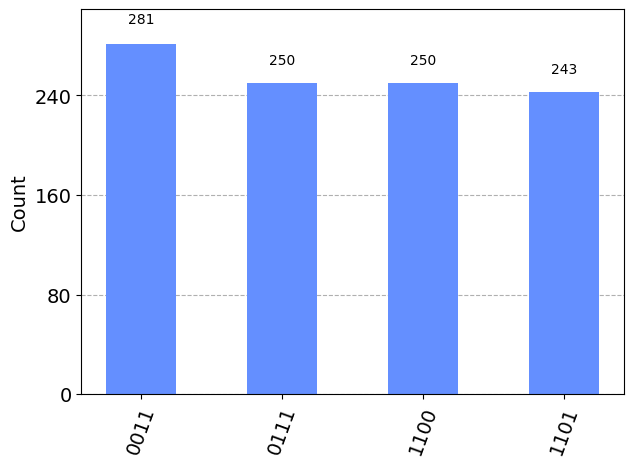

In [15]:
plot_histogram(result.circuit_results)

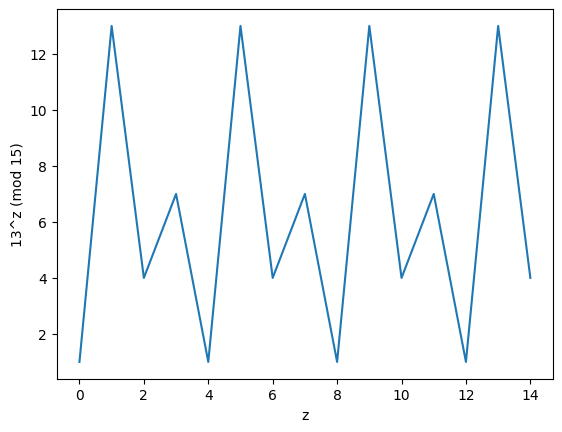

4
x: 4.0
5 3


In [16]:

import math
import matplotlib.pyplot as mpl
import numpy as np
N = 15
a = 13

#N = 21
#a = 2
math.gcd(a, N)
z = list(range(N))
y = [a**z0 % N for z0 in z]

mpl.plot(z,y)
mpl.xlabel('z')
mpl.ylabel(f'{a}^z (mod {N})')
mpl.show()

r = z[y[1:].index(1)+1]
print(r)

if r % 2 == 0:
    x = (a**(r/2.)) % N
    print(f'x: {x}')
    if((x+1) % N) != 0:
        print(math.gcd((int(x)+1),N), math.gcd((int(x)-1),N))
    else:
        print('x+1 is 0 (mod N)')
else:
    print('r is odd')